In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data_new = data.iloc[:,1:]
data_new.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
def norm(i):
    x = (i - i.min())/(i.max()-i.min())
    return x

In [10]:
norm_data = norm(data_new)
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [12]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

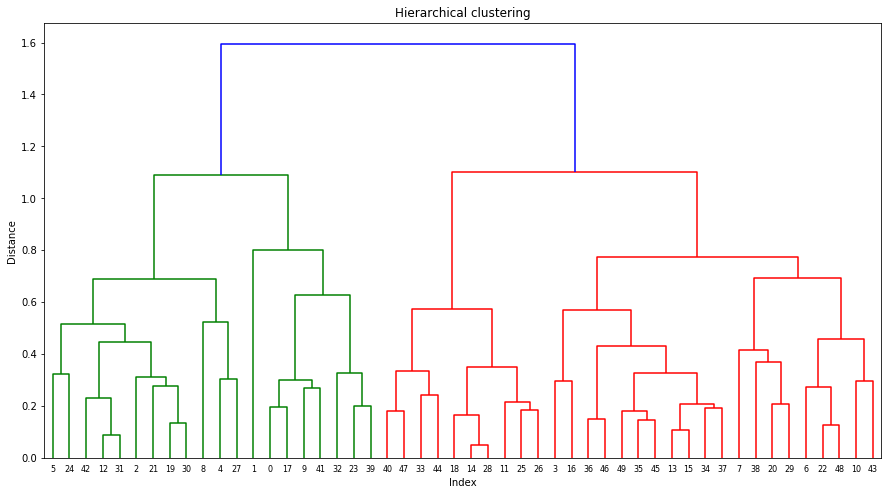

In [17]:
z = linkage(norm_data, method='complete', metric='euclidean')
plt.figure(figsize=(15,8))
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Hierarchical clustering')

sch.dendrogram(z,leaf_rotation=0.)
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
h_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete').fit(norm_data)
cluster_labels = pd.Series(h_cluster.labels_)
cluster_labels

0     0
1     0
2     3
3     1
4     3
5     3
6     1
7     1
8     3
9     0
10    1
11    2
12    3
13    1
14    2
15    1
16    1
17    0
18    2
19    3
20    1
21    3
22    1
23    0
24    3
25    2
26    2
27    3
28    2
29    1
30    3
31    3
32    0
33    2
34    1
35    1
36    1
37    1
38    1
39    0
40    2
41    0
42    3
43    1
44    2
45    1
46    1
47    2
48    1
49    1
dtype: int64

In [22]:
data['cluster'] = cluster_labels
data = data.iloc[:,[5,0,1,2,3,4]]
data.head()

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,3,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6


In [24]:
data_new = data.iloc[:,2:].groupby(data['cluster']).median()
data_new.head()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,13.80,254.0,53.0,22.35
1,5.95,132.5,70.0,18.40
2,2.40,82.0,52.0,11.25
3,11.20,254.5,80.0,31.45
